In [3]:
%autosave 0

Autosave disabled


In [1]:
!python -V

Python 3.8.11


In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

tf.__version__

2021-11-27 12:28:58.211293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-27 12:28:58.211346: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.6.0'

In [4]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [7]:
model = keras.models.load_model('dogs_cats_10_0.687.h5')

In [27]:
img = load_img('cat.jpg', target_size=(150, 150))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

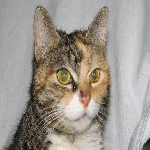

In [32]:
img

In [33]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [34]:
preds = model.predict(X)

In [35]:
preds

array([[0.702151]], dtype=float32)

In [36]:
classes = [
    'cat',
    'dog'
]

In [37]:
dict(zip(classes, preds[0]))

{'cat': 0.702151}

## Convert Keras to TF-Lite

In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('dogs_cats_10_0.687.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2021-11-27 13:20:15.050459: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpum3sf4b5/assets


2021-11-27 13:20:17.937231: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-27 13:20:17.937642: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-27 13:20:18.048814: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.018ms.
  function_optimizer: function_optimizer did nothing. time = 0.003ms.

2021-11-27 13:20:20.684551: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-27 13:20:20.684628: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-11-27 13:20:21.688865: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:210] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


In [39]:
!ls -lh

total 129M
-rwxrwxrwx 1 asayalar asayalar  303 Nov 27 12:20 Dockerfile
-rwxrwxrwx 1 asayalar asayalar  32K Sep 20  2013 dog.jpg
-rwxrwxrwx 1 asayalar asayalar  86M Nov 27 12:24 dogs_cats_10_0.687.h5
-rwxrwxrwx 1 asayalar asayalar  43M Nov 27 13:20 dogs_cats_10_0.687.tflite
-rwxrwxrwx 1 asayalar asayalar 4.5K Nov 27 12:20 homework.md
-rwxrwxrwx 1 asayalar asayalar  995 Nov 27 12:20 lambda_function.py
-rwxrwxrwx 1 asayalar asayalar  20K Nov 27 12:20 tensorflow-model.ipynb
-rwxrwxrwx 1 asayalar asayalar  200 Nov 27 12:20 test.py


In [40]:
import tensorflow.lite as tflite

In [41]:
interpreter = tflite.Interpreter(model_path='dogs_cats_10_0.687.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [42]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [43]:
classes = [
    'cat',
    'dog'
]

dict(zip(classes, preds[0]))

{'cat': 0.70215106}

## Removing TF dependency

In [44]:
from PIL import Image

In [46]:
with Image.open('cat.jpg') as img:
    img = img.resize((150, 150), Image.NEAREST)

In [47]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [48]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [49]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [50]:
classes = [
    'cat',
    'dog'
]

dict(zip(classes, preds[0]))

{'cat': 0.70215106}

## Simpler way of doing it

In [51]:
!pip install keras-image-helper

In [52]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     |████████████████████████████████| 1.5 MB 811 kB/s 


In [54]:
#import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

ImportError: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/asayalar/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/tflite_runtime/_pywrap_tensorflow_interpreter_wrapper.cpython-38-x86_64-linux-gnu.so)

In [4]:
interpreter = tflite.Interpreter(model_path='clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [5]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [6]:
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)

In [7]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [8]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

{'dress': -1.8682901,
 'hat': -4.7612457,
 'longsleeve': -2.3169823,
 'outwear': -1.0625706,
 'pants': 9.8871565,
 'shirt': -2.8124304,
 'shoes': -3.6662836,
 'shorts': 3.200361,
 'skirt': -2.6023388,
 't-shirt': -4.835045}